In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", sep='\s+', names=column_names)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ibols\AppData\Local\Temp\ipykernel_18088\3830507826.py:8: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("housing.csv", sep='\s+', names=column_names)


разделение данных

In [3]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_log_error

функция для отсрисовки кривой обучения и целевого значения. в качестве целевого значения будем использовать значение метрики MAE

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def plot_learning_curve(model, model_name, target_metric=False):
    train_size_abs, train_scores, test_scores = learning_curve(
        model, X, y, cv=50, scoring='neg_mean_absolute_error'
    )
    plt.plot(train_size_abs, -train_scores.mean(axis=1), label="тренировочная выборка")
    plt.plot(train_size_abs, -test_scores.mean(axis=1), label="тестовая выборка")
    plt.title(model_name)
    plt.ylabel("MAE")
    plt.xlabel("Количество данных")
    if target_metric:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        plt.plot(train_size_abs, len(train_size_abs) * [mean_absolute_error(y_test, y_pred)], label="Целевая метрика", color='r')
    plt.legend()
    plt.show()

решающее дерево

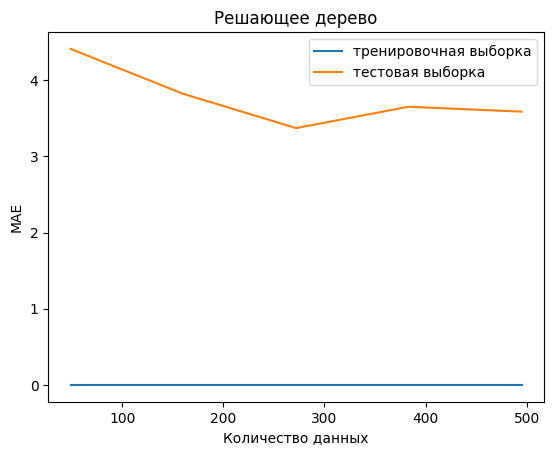

In [6]:
plot_learning_curve(DecisionTreeRegressor(random_state=0), "Решающее дерево")

из графика можно сделать вывод, что модель переобучается, низкая ошибка на тренировочной выборке и высокая на тестовой. но по мере увеличения данных, она снижается. Предположим, что значение целевой метрики будет на уровне трех

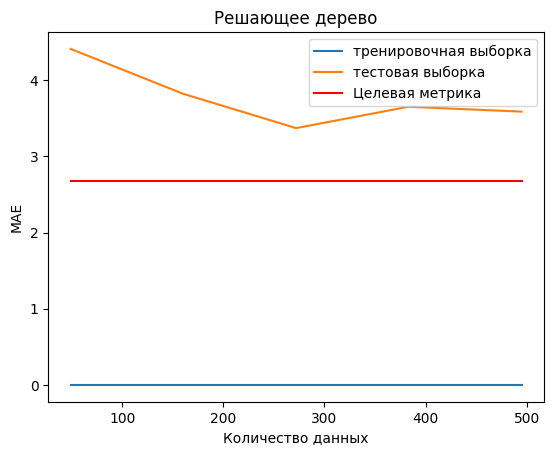

In [7]:
plot_learning_curve(DecisionTreeRegressor(random_state=0), "Решающее дерево", True)

значение оказалось близко к 3

теперь метод ближайших соседей

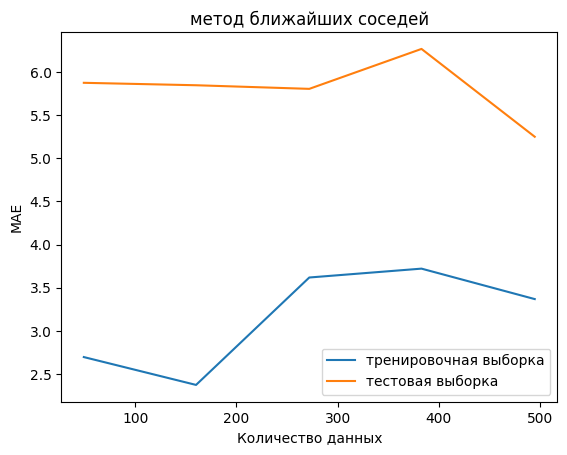

In [9]:
plot_learning_curve(KNeighborsRegressor(), "метод ближайших соседей")

здесь же модель не успевает обучится. скорее всего целевое значение будет выше, на уровне 4

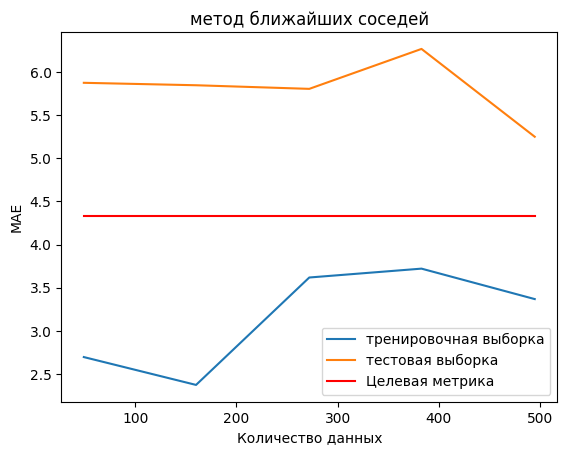

In [10]:
plot_learning_curve(KNeighborsRegressor(), "метод ближайших соседей", True)

оказалось ближе к уровню 4.5

лучше оказалась модель рещающего дерева, хоть она и переобучается. Возможно подобрав гиперпараметры или применив регуляризацию можно получить лучший рещультат

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

функция для получентя значения метрик, коэффициентов(весов) и свободного члена(смещения) модели

In [12]:
def get_metrics_coef_intrecept(clf):
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    print("MSE:", mean_squared_error(y_test, y_pred_test))
    print("MAE:", mean_absolute_error(y_test, y_pred_test))
    print("R2:", r2_score(y_test, y_pred_test))
    return clf.coef_, clf.intercept_

определим два массива, куда будем складвать коэффициенты и свободные челны

In [13]:
coefs = []
intercepts = []

линейная регрессия

In [14]:
coef, inter = get_metrics_coef_intrecept(LinearRegression())
coefs.append(coef)
intercepts.append(inter)

MSE: 25.790362150702578
MAE: 3.633127374024628
R2: 0.6882607142538003


Lasso регуляризация

In [15]:
coef, inter = get_metrics_coef_intrecept(Lasso())
coefs.append(coef)
intercepts.append(inter)

MSE: 31.53543581631389
MAE: 3.9052716065190807
R2: 0.6188175187448849


Гребневая регуляризация

In [16]:
coef, inter = get_metrics_coef_intrecept(Ridge())
coefs.append(coef)
intercepts.append(inter)

MSE: 25.948066675130853
MAE: 3.607288406294633
R2: 0.6863544713124667


сравния значения метрик, можно сделать вывод, что линейная регрессия и гребневая регуляризация дали достаточно близкие показатели и хорошие показатели, в то время как Lasso регуляризация от них отстает.

In [17]:
df = pd.DataFrame(coefs, index=["Логистическая регрессия", "Lasso", "Ridge"])
df["Свободный член"] = intercepts
print(df)

                                0         1         2         3          4  \
Логистическая регрессия -0.103747  0.055859  0.058824  2.505235 -19.028489   
Lasso                   -0.053634  0.059037 -0.000000  0.000000  -0.000000   
Ridge                   -0.101214  0.057152  0.013977  2.412818  -9.243854   

                                5         6         7         8         9  \
Логистическая регрессия  3.253536 -0.003222 -1.576035  0.258716 -0.011468   
Lasso                    0.494038  0.012466 -0.855059  0.195092 -0.013289   
Ridge                    3.331540 -0.013262 -1.452107  0.229841 -0.012032   

                               10        11        12  Свободный член  
Логистическая регрессия -1.107775  0.005501 -0.559570       45.481420  
Lasso                   -0.857234  0.005659 -0.786233       48.595989  
Ridge                   -0.993622  0.005890 -0.567121       38.601050  


In [18]:
X.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Видно, что много признаков коррелируют и вес одного из таких признаков, как правило, большой, а другой маленький